In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [31]:
df.isnull().sum().any()

False

In [32]:
df["Glucose"].value_counts()[0]

5

In [33]:
df_copy = df.copy()
df_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)


In [34]:
df_copy.isnull().sum().any()

True

In [35]:
df_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

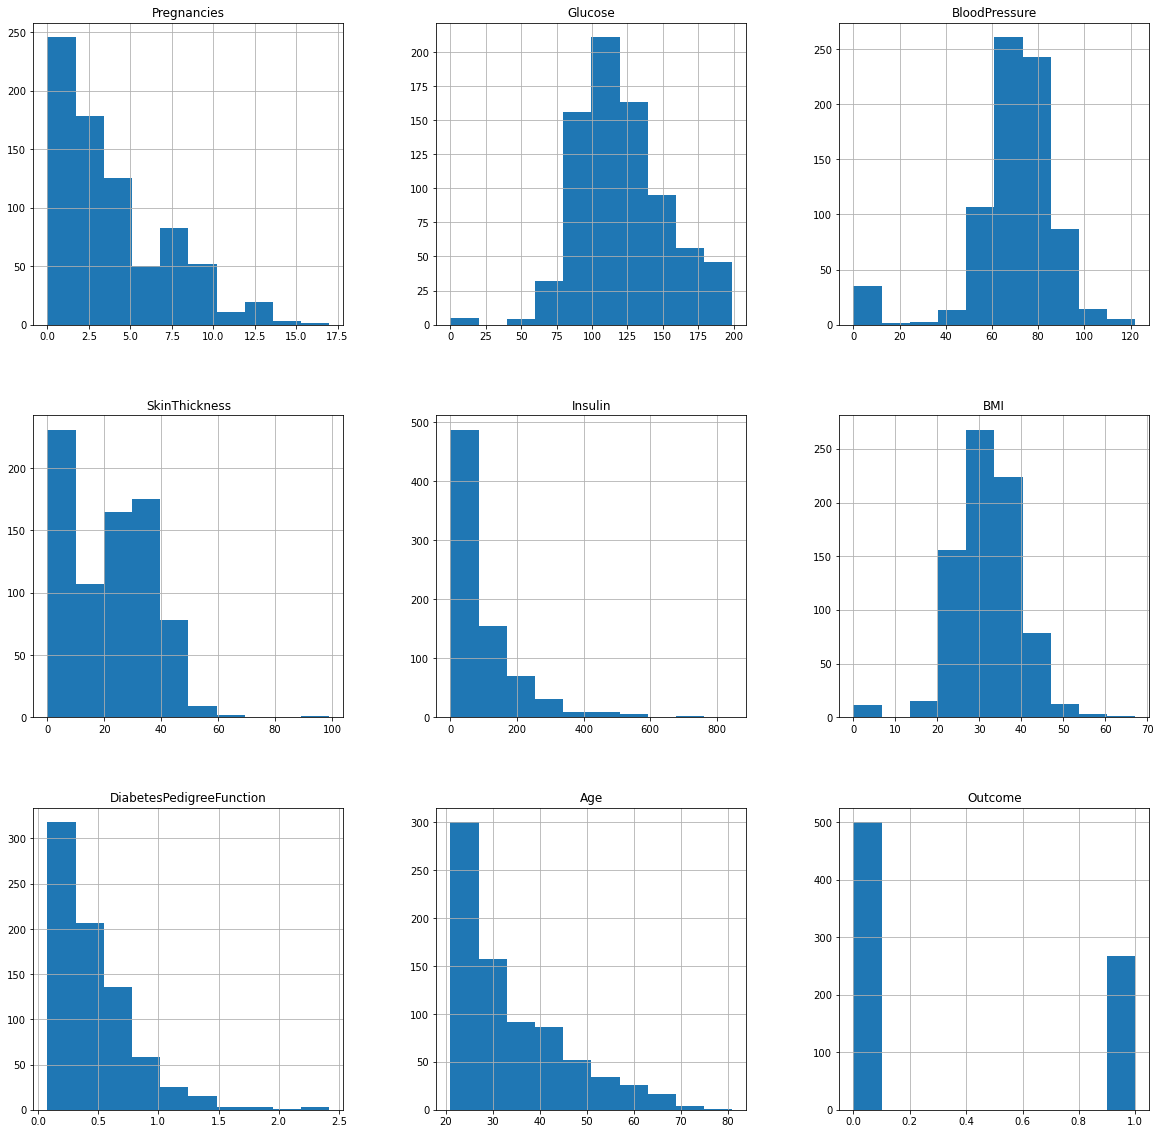

In [36]:
df.hist(figsize=(20,20));

In [37]:
df_copy["Glucose"].fillna(df_copy["Glucose"].mean(),inplace=True)
df_copy["BloodPressure"].fillna(df_copy["BloodPressure"].mean(),inplace=True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].median(),inplace=True)
df_copy["Insulin"].fillna(df_copy["Insulin"].median(),inplace=True)
df_copy["BMI"].fillna(df_copy["BMI"].mean(),inplace=True)

In [38]:
df_copy.isnull().sum().any()

False

In [39]:
X = df_copy.drop("Outcome",axis=1)
y = df_copy["Outcome"]

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaler = ss.fit_transform(X)
df_X = pd.DataFrame(X_scaler,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df_X,y,test_size=0.3,random_state=42)

## K-Nearest Neighbors

<center><img src = "knn2.png" style="widht:400px;height:300px" ><center>

K- Nearest Neighbors(K-En Yakın Komşu) algoritması, vakaları diğer vakalarla benzerliklerine göre sınıflandırır. "Aynı sınıf etiketlerine sahip benzer durumlar birbirine yakındır" düşüncesini benimser. İki nokta arasındaki mesafe farklılığın bir ölçüsüdür.

Algoritma adımları şöyle ilerler: 

1- K için bir değer seçin.

2- Veri kümesindeki vakaların her birinden yeni durumdan uzaklığı hesaplayın. 

<center><img src = "öklid.png" style="widht:400px;height:300px" ><center>

3- Bilinmeyen veri noktasının ölçümlerine en yakın olan eğitim verilerindeki K-gözlemlerini arayın.

4- En Yakın Komşulardan gelen en popüler yanıt değerini kullanarak bilinmeyen veri noktasının yanıtını tahmin edin.

<center><img src = "knn.png" style="widht:400px;height:300px" ><center>

## Performans Değerlendirme Metrikleri

### Confusion Matrix

Bir sınıflandırma modelinin performansını değerlendirmek için kullanılan bir tablodur. İki sınıf (gerçek ve tahmin edilen) ve bu sınıflara ait doğru ve yanlış sınıflandırılan örnekleri gösterir. Karmaşıklık matrisi dört temel terimden oluşur:

True Positive (TP): Gerçek pozitif, doğru olarak pozitif olarak tahmin edilen örnekler.

True Negative (TN): Gerçek negatif, doğru olarak negatif olarak tahmin edilen örnekler.

False Positive (FP): Yanlış pozitif, yanlış olarak pozitif olarak tahmin edilen örnekler.

False Negative (FN): Yanlış negatif, yanlış olarak negatif olarak tahmin edilen örnekler.

<center><img src = "cf.png" style="widht:400px;height:300px" ><center>

### Recall (Duyarlılık)

Bu metrik, bir sınıfın ne kadar iyi tespit edildiğini gösterir. Yani, gerçek pozitiflerin, gerçek pozitiflerle yanlış negatiflerin toplamına oranıdır. Recall, kaç tane gerçek pozitif örneğinin doğru bir şekilde tespit edildiğini belirtir. Yüksek recall değeri, modelin olumlu örnekleri kaçırmama yeteneğini gösterir.

<center><img src = "recall.png" style="widht:200px;height:100px" ><center>

## Precision (Hassasiyet)

Bu metrik, bir sınıfın ne kadar doğru tahmin edildiğini gösterir. Yani, doğru pozitiflerin, doğru pozitiflerle yanlış pozitiflerin toplamına oranıdır. Precision, pozitif olarak tahmin edilen örneklerin ne kadarının gerçekten pozitif olduğunu gösterir. Yüksek precision değeri, modelin pozitif tahminlerinin doğruluğunu gösterir.
<center><img src = "precision.png" style="widht:100px;height:100px" ><center>

### F1 Score

Precision ve recall'ın harmonik ortalamasıdır. F1-score, bir sınıflandırıcı modelin kesinliği ve kapsamlılığı arasındaki dengeyi sağlayarak bir performans ölçüsü sağlar.

<center><img src = "f1score.png" style="widht:100px;height:100px" ><center>

## Models Building

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [43]:
knn_model = knn.fit(X_train,y_train)

In [44]:
y_pred = knn_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7186147186147186

Classification Report is:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       151
           1       0.59      0.62      0.61        80

    accuracy                           0.72       231
   macro avg       0.69      0.70      0.69       231
weighted avg       0.72      0.72      0.72       231


 F1:
 0.6060606060606061

 Precision score is:
 0.5882352941176471

 Recall score is:
 0.625

 Confusion Matrix:

[[116  35]
 [ 30  50]]


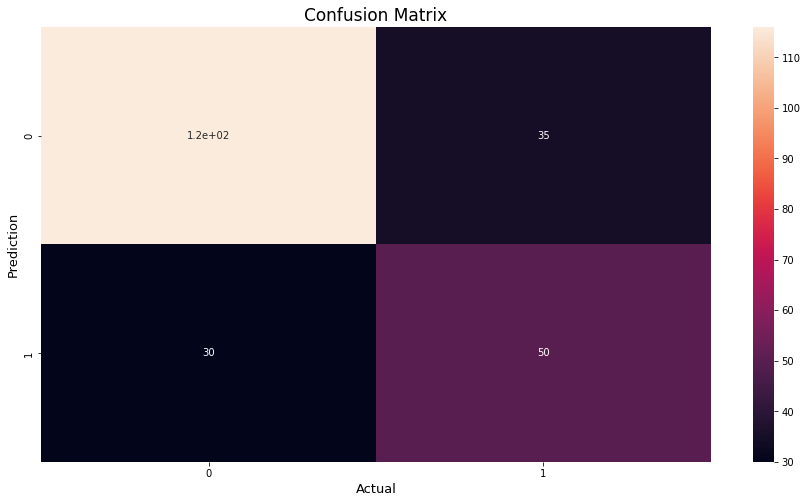

In [46]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("\n F1:\n",f1_score(y_test,y_pred))
print("\n Precision score is:\n",precision_score(y_test,y_pred))
print("\n Recall score is:\n",recall_score(y_test,y_pred))
print("\n Confusion Matrix:\n")
print(confusion_matrix(y_test,y_pred))
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

### Model Tuning

In [47]:
test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [48]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [49]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.89177489177489 % and k = [13]


c:\Users\muser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\muser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


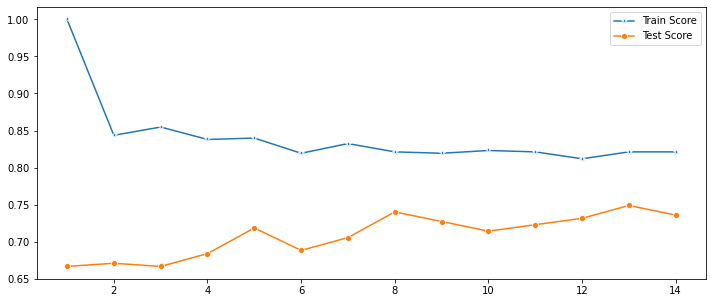

In [50]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')